# Import libraries and dataset
_Please run the code in this segment before everything else!_

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from IPython.display import display

In [5]:
# Prevent Pandas from wrapping output
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
# pd.set_option('display.expand_frame_repr', False)

In [6]:
taxis_base_df = pd.read_csv("taxis.csv") # Load Dataframe

In [7]:
display(taxis_base_df.head())   # Inspect dataframe to check everything's OK

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


# Question 1(a)
Separate date and time for both pickup and dropoff, creating four new columns, 'pickup_date', 'pickup_time', 'dropoff_date','dropoff_time'.   
  
For the dates, keep only the day value as the Year  and month remains the same. Add the new columns to the existing DF. Display the first 5 rows from your DF.  [4 marks

In [9]:
# Q1(a) [CELL 1]
# Convert pickup and dropoff columns into datetime for easier processing
taxis_base_df['pickup'] = pd.to_datetime(taxis_base_df['pickup'])
taxis_base_df['dropoff'] = pd.to_datetime(taxis_base_df['dropoff'])

# Extract day (ONLY!) and time from pickup and dropoff columns, and push into new columns
taxis_base_df['pickup_date'] = taxis_base_df['pickup'].dt.day 
taxis_base_df['pickup_time'] = taxis_base_df['pickup'].dt.time
taxis_base_df['dropoff_date'] = taxis_base_df['dropoff'].dt.day
taxis_base_df['dropoff_time'] = taxis_base_df['dropoff'].dt.time

print("First Five Rows from DF after adding 'pickup_date', 'pickup_time', 'dropoff_date' and 'dropoff_time' as new columns:\n")
display(taxis_base_df.head(5))

First Five Rows from DF after adding 'pickup_date', 'pickup_time', 'dropoff_date' and 'dropoff_time' as new columns:



,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_date,pickup_time,dropoff_date,dropoff_time
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,23,20:21:09,23,20:27:24
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,4,16:11:55,4,16:19:00
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,27,17:53:01,27,18:00:25
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,10,01:23:59,10,01:49:51
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,30,13:27:42,30,13:37:14


# Question 1(b)
Compute the following for each car type- Green and Yellow.  [10 marks] 

i. Total fare, use the fare column in the DF  
ii. Total number of passengers travelled  
iii. Total distance travelled  
iv. Total time of travel.  (Days, Hours, Minutes, Seconds)

Hint: Look up the datetime python library.

In [10]:
# Q1(b) [CELL 1]
# Generate new DFs containing only green and yellow taxis respectively
yellow_taxis_df = taxis_base_df.loc[taxis_base_df['color']=='yellow']
green_taxis_df = taxis_base_df.loc[taxis_base_df['color']=='green']

# Print heads for debugging (to make sure loc is running correctly)
print("[Debug] Head of Yellow Taxis DF")
display(yellow_taxis_df.head())
print()
print("[Debug] Head of Green Taxis DF")
display(green_taxis_df.head())

[Debug] Head of Yellow Taxis DF


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_date,pickup_time,dropoff_date,dropoff_time
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,23,20:21:09,23,20:27:24
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,4,16:11:55,4,16:19:00
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,27,17:53:01,27,18:00:25
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,10,01:23:59,10,01:49:51
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,30,13:27:42,30,13:37:14



[Debug] Head of Green Taxis DF


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_date,pickup_time,dropoff_date,dropoff_time
5451,2019-03-24 15:05:22,2019-03-24 15:26:32,1,2.29,15.0,0.0,0.0,15.8,green,cash,Forest Hills,Corona,Queens,Queens,24,15:05:22,24,15:26:32
5452,2019-03-14 22:04:04,2019-03-14 22:10:00,1,0.80,5.5,0.0,0.0,6.8,green,credit card,Kew Gardens,Kew Gardens,Queens,Queens,14,22:04:04,14,22:10:00
5453,2019-03-29 18:12:27,2019-03-29 18:20:40,1,1.51,7.5,1.2,0.0,10.5,green,credit card,East Harlem North,East Harlem South,Manhattan,Manhattan,29,18:12:27,29,18:20:40
5454,2019-03-06 11:11:33,2019-03-06 11:15:15,1,0.45,4.5,0.0,0.0,5.3,green,cash,East Harlem North,East Harlem South,Manhattan,Manhattan,6,11:11:33,6,11:15:15
5455,2019-03-04 18:43:53,2019-03-04 18:46:50,1,0.61,4.0,0.0,0.0,5.8,green,cash,Carroll Gardens,Carroll Gardens,Brooklyn,Brooklyn,4,18:43:53,4,18:46:50


In [11]:
# Q1(b) [CELL 2]
# For Yellow Taxis:
yellow_total_fare = yellow_taxis_df['fare'].sum()                   # Calculate total fare
yellow_total_passengers = yellow_taxis_df['passengers'].sum()       # Calculate total passengers
yellow_distance_travelled = yellow_taxis_df['distance'].sum()       # Calculate total distance
yellow_total_time_travelled = (yellow_taxis_df['dropoff'] - yellow_taxis_df['pickup']).sum()    # Calculate total time of travel

# For Green Taxis:
green_total_fare = green_taxis_df['fare'].sum()                   # Calculate total fare
green_total_passengers = green_taxis_df['passengers'].sum()       # Calculate total passengers
green_distance_travelled = green_taxis_df['distance'].sum()       # Calculate total distance
green_total_time_travelled = (green_taxis_df['dropoff'] - green_taxis_df['pickup']).sum()    # Calculate total time of travel

# Consolidate into DF
green_yellow_total_metrics_dict = {
    'yellow': [yellow_total_fare, yellow_total_passengers, yellow_distance_travelled, yellow_total_time_travelled],
    'green': [green_total_fare, green_total_passengers, green_distance_travelled, green_total_time_travelled]}
green_yellow_total_metrics_df = pd.DataFrame(green_yellow_total_metrics_dict, index=['Total Fare', 'Total Passengers', 'Total Distance', 'Total Time of Travel'])

print("[Q1b] Total fare, number of passengers, distance travelled \nand time of travel for yellow and green cars:\n")
display(green_yellow_total_metrics_df)

[Q1b] Total fare, number of passengers, distance travelled 
and time of travel for yellow and green cars:



,yellow,green
Total Fare,70426.72,13788.15
Total Passengers,8676,1226
Total Distance,16111.41,3345.95
Total Time of Travel,53 days 10:53:19,10 days 15:37:46


# Q2
Extract the details of the trip with the longest distance travelled for each of color of cars (green and yellow). Do this for each of the pickup dates shown below where a customer paid using cash.  
  
Dates: 10, 15, 20, 25, and 30.   
  
If none for any case, return a 0. Display your output in  a new dataframe named GY_cash, which should only have the following
columns:   
  
Pickup_date, Color of the cab, distance travelled, pickup, 
pickup_date, pickup_time, dropoff, dropoff_date, dropoff_time, and the fare.   
  
[10 marks]

In [12]:
# Q2 [CELL 1]
GY_cash = pd.DataFrame()
for date in [10, 15, 20, 25, 30]:
    for colour in [yellow_taxis_df, green_taxis_df]:
        trips = colour.loc[(colour['pickup_date']==date) & (colour['payment']=='cash')]
        if len(trips)==0:
            row_data = pd.DataFrame([{
                "colour_of_cab": 0,
                "distance_travelled": 0,
                "pickup": 0,
                "pickup_date": date,
                "pickup_time": 0,
                "dropoff": 0,
                "dropoff_date": 0,
                "dropoff_time": 0,
                "fare": 0
            }], index=['NA'])
            GY_cash = pd.concat([GY_cash, row_data])
        else:
            details = trips.loc[trips['distance'].idxmax()]
            idx = trips['distance'].idxmax()
            row_data = pd.DataFrame([{
                "colour_of_cab": details['color'],
                "distance_travelled": details['distance'],
                "pickup": details['pickup'],
                "pickup_date": details['pickup_date'],
                "pickup_time": details['pickup_time'],
                "dropoff": details['dropoff'],
                "dropoff_date": details['dropoff_date'],
                "dropoff_time": details['dropoff_time'],
                "fare": details['fare']
            }], index=[idx])
            GY_cash = pd.concat([GY_cash, row_data])

print("Q2: [Details of trip with longest distance on date 10, 15, 20, 25 and 30, \nfor yellow cabs, and green cabs]\n")
print("-"*80)
display(GY_cash)


Q2: [Details of trip with longest distance on date 10, 15, 20, 25 and 30, 
for yellow cabs, and green cabs]

--------------------------------------------------------------------------------


,colour_of_cab,distance_travelled,pickup,pickup_date,pickup_time,dropoff,dropoff_date,dropoff_time,fare
5137,yellow,11.52,2019-03-10 00:13:12,10,00:13:12,2019-03-10 00:33:09,10,00:33:09,32.5
5552,green,16.01,2019-03-10 00:59:49,10,00:59:49,2019-03-10 01:36:25,10,01:36:25,47.0
3977,yellow,15.64,2019-03-15 16:45:55,15,16:45:55,2019-03-15 17:46:47,15,17:46:47,50.0
5630,green,4.71,2019-03-15 06:42:17,15,06:42:17,2019-03-15 06:54:38,15,06:54:38,15.0
302,yellow,17.01,2019-03-20 17:22:33,20,17:22:33,2019-03-20 18:07:19,20,18:07:19,52.0
6381,green,6.66,2019-03-20 12:04:33,20,12:04:33,2019-03-20 12:28:07,20,12:28:07,20.0
5144,yellow,12.12,2019-03-25 05:33:43,25,05:33:43,2019-03-25 05:58:38,25,05:58:38,35.5
5597,green,8.80,2019-03-25 10:10:11,25,10:10:11,2019-03-25 10:46:25,25,10:46:25,31.0
4075,yellow,17.14,2019-03-30 14:56:08,30,14:56:08,2019-03-30 15:49:32,30,15:49:32,52.0
5758,green,10.32,2019-03-30 09:25:32,30,09:25:32,2019-03-30 09:54:33,30,09:54:33,31.0


# Q3
From your GY_cash, identify by extracting the information on which color cab travelled larger distance on each pickup date with the corresponding distance information. Display your result in a new dataframe named GY_maxDist.  
  
A typical row of this DF should be:  
[Pickup_date, Color of the cab, distance travelled, pickup, pickup_date, pickup_time, dropoff, dropoff_date, dropoff_time, fare]   
  
[6 marks] 


In [13]:
# Q3 [CELL 1]

# Execute groupby on pickup dates, and subsequently run idxmax on each group to determine which colour travelled a longer distance.
# (This should return a series of indexes which we can use to filter the GY_cash dataframe)
dist_idxmax_for_groups = GY_cash.groupby('pickup_date')['distance_travelled'].idxmax()

# Generate new DF with the cabs which have travelled longer distances on dates 10, 15, 20, 25 and 30
GY_maxDist = GY_cash.loc[dist_idxmax_for_groups]

# Print results
print(" Q3 \n\n[GY_maxDist dataframe, showing trip details of the cab which travelled \nlonger distances on Dates 10, 15, 20, 25 and 30]\n\n")
display(GY_maxDist)

 Q3 

[GY_maxDist dataframe, showing trip details of the cab which travelled 
longer distances on Dates 10, 15, 20, 25 and 30]




,colour_of_cab,distance_travelled,pickup,pickup_date,pickup_time,dropoff,dropoff_date,dropoff_time,fare
5552,green,16.01,2019-03-10 00:59:49,10,00:59:49,2019-03-10 01:36:25,10,01:36:25,47.0
3977,yellow,15.64,2019-03-15 16:45:55,15,16:45:55,2019-03-15 17:46:47,15,17:46:47,50.0
302,yellow,17.01,2019-03-20 17:22:33,20,17:22:33,2019-03-20 18:07:19,20,18:07:19,52.0
5144,yellow,12.12,2019-03-25 05:33:43,25,05:33:43,2019-03-25 05:58:38,25,05:58:38,35.5
4075,yellow,17.14,2019-03-30 14:56:08,30,14:56:08,2019-03-30 15:49:32,30,15:49:32,52.0


# Q4
Write a function to calculate the actual speed in meters per second of the vehicle.  Given  the  distance,  start  time  and  end  time.  Assume  that  the distances  given  are  in  kilometers.  Use  the  apply  method  in  pandas  to  apply  the  function  to  GY_maxDist  and  create  a  new  column  with  this information called speed. Display your GY_maxDist DF.  
   
[7 marks]

In [14]:
def calculate_speed(dist, pickup_datetime, dropoff_datetime):
    # Inputs:
    #   1. Distance travelled (kilometers)
    #   2. DateTime of Pickup
    #   2. DateTime of Dropoff
    trip_duration_seconds = (dropoff_datetime - pickup_datetime).total_seconds()
    dist_meters = dist*1000
    speed = dist_meters/trip_duration_seconds
    return speed

# Apply function to create new speed column
GY_maxDist['speed'] = GY_maxDist.apply(lambda x: calculate_speed(x['distance_travelled'], x['pickup'], x['dropoff']), axis=1)     # Apply (through lambda function) the calculate_speed function onto the three specified columns

# Print GY_maxDist DF
print("Q4\nGY_maxDist DataFrame showing actual speed in m/s:")
display(GY_maxDist)

Q4
GY_maxDist DataFrame showing actual speed in m/s:


,colour_of_cab,distance_travelled,pickup,pickup_date,pickup_time,dropoff,dropoff_date,dropoff_time,fare,speed
5552,green,16.01,2019-03-10 00:59:49,10,00:59:49,2019-03-10 01:36:25,10,01:36:25,47.0,7.290528
3977,yellow,15.64,2019-03-15 16:45:55,15,16:45:55,2019-03-15 17:46:47,15,17:46:47,50.0,4.282585
302,yellow,17.01,2019-03-20 17:22:33,20,17:22:33,2019-03-20 18:07:19,20,18:07:19,52.0,6.332837
5144,yellow,12.12,2019-03-25 05:33:43,25,05:33:43,2019-03-25 05:58:38,25,05:58:38,35.5,8.107023
4075,yellow,17.14,2019-03-30 14:56:08,30,14:56:08,2019-03-30 15:49:32,30,15:49:32,52.0,5.349563


# Q5
Using the DF from Q1, starting from 'Brooklyn’ borough and dropping off in ‘Manhattan’ borough, how many trips were made with the pickup date between the dates 10th March and 25th March? For each of these trips, compute the actual speed of the cars and output the mean speed of green cars and mean speed of yellow cars.   
  
Note that the dates are inclusive (include 10 and 25 March)

[5 marks]

In [15]:
# Q5

# We start with taxis_base_df from Q1.
# loc is used to perform filtering to extract trips starting in Brooklyn and ending in Manhattan, from 10 to 25 Mar (inclusive)
brooklyn_to_manhattan_d10_to_d25_trips = taxis_base_df.loc[
    (taxis_base_df['pickup_borough']=='Brooklyn') & 
    (taxis_base_df['dropoff_borough']=='Manhattan') & 
    (taxis_base_df['pickup_date'] >= 10) &
    (taxis_base_df['pickup_date'] <= 25)].copy()

# [Debug] Display head for verification
display(brooklyn_to_manhattan_d10_to_d25_trips.head())


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_date,pickup_time,dropoff_date,dropoff_time
694,2019-03-13 11:12:11,2019-03-13 11:47:17,1,7.0,28.5,6.35,0.00,38.15,yellow,credit card,Brooklyn Heights,Midtown East,Brooklyn,Manhattan,13,11:12:11,13,11:47:17
768,2019-03-15 23:02:19,2019-03-15 23:42:01,6,8.4,31.5,2.00,0.00,37.30,yellow,credit card,Prospect Heights,Upper West Side South,Brooklyn,Manhattan,15,23:02:19,15,23:42:01
850,2019-03-15 06:56:25,2019-03-15 07:59:38,2,18.7,57.0,0.00,5.76,63.56,yellow,credit card,East New York,Lenox Hill East,Brooklyn,Manhattan,15,06:56:25,15,07:59:38
1820,2019-03-11 07:43:14,2019-03-11 07:58:46,1,4.1,14.5,4.00,0.00,21.80,yellow,credit card,Downtown Brooklyn/MetroTech,Flatiron,Brooklyn,Manhattan,11,07:43:14,11,07:58:46
1979,2019-03-22 18:27:32,2019-03-22 19:04:29,1,5.8,22.0,0.00,0.00,23.80,yellow,credit card,Bedford,Gramercy,Brooklyn,Manhattan,22,18:27:32,22,19:04:29


In [16]:
# Number of trips made
print("Number of trips made from BROOKLYN to MANHATTAN, from 10th to 25th March (Inclusive):")
print(f"{len(brooklyn_to_manhattan_d10_to_d25_trips)} Trips")

Number of trips made from BROOKLYN to MANHATTAN, from 10th to 25th March (Inclusive):
28 Trips


In [17]:
# Apply function from Q4 to calculate speed of cars
# brooklyn_to_manhattan_d10_to_d25_trips['speed'] = brooklyn_to_manhattan_d10_to_d25_trips.apply(lambda x: calculate_speed(x['distance'], x['pickup'], x['dropoff']), axis=1)     # Apply (through lambda function) the calculate_speed function onto the three specified columns
brooklyn_to_manhattan_d10_to_d25_trips['speed'] = brooklyn_to_manhattan_d10_to_d25_trips.apply(lambda x: calculate_speed(x['distance'], x['pickup'], x['dropoff']), axis=1)     # Apply (through lambda function) the calculate_speed function onto the three specified columns

print("Updated Dataframe:")
display(brooklyn_to_manhattan_d10_to_d25_trips.head())
print()

mean_speed_series = brooklyn_to_manhattan_d10_to_d25_trips.groupby('color')['speed'].mean()
print("Mean Speed of Green and Yellow Cars:")
display(mean_speed_series)

Updated Dataframe:


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_date,pickup_time,dropoff_date,dropoff_time,speed
694,2019-03-13 11:12:11,2019-03-13 11:47:17,1,7.0,28.5,6.35,0.00,38.15,yellow,credit card,Brooklyn Heights,Midtown East,Brooklyn,Manhattan,13,11:12:11,13,11:47:17,3.323837
768,2019-03-15 23:02:19,2019-03-15 23:42:01,6,8.4,31.5,2.00,0.00,37.30,yellow,credit card,Prospect Heights,Upper West Side South,Brooklyn,Manhattan,15,23:02:19,15,23:42:01,3.526448
850,2019-03-15 06:56:25,2019-03-15 07:59:38,2,18.7,57.0,0.00,5.76,63.56,yellow,credit card,East New York,Lenox Hill East,Brooklyn,Manhattan,15,06:56:25,15,07:59:38,4.930134
1820,2019-03-11 07:43:14,2019-03-11 07:58:46,1,4.1,14.5,4.00,0.00,21.80,yellow,credit card,Downtown Brooklyn/MetroTech,Flatiron,Brooklyn,Manhattan,11,07:43:14,11,07:58:46,4.399142
1979,2019-03-22 18:27:32,2019-03-22 19:04:29,1,5.8,22.0,0.00,0.00,23.80,yellow,credit card,Bedford,Gramercy,Brooklyn,Manhattan,22,18:27:32,22,19:04:29,2.616148



Mean Speed of Green and Yellow Cars:


color
green     3.357360
yellow    4.203138
Name: speed, dtype: float64

# Q6 
Between 2.30pm and 4pm on March 17th, which color cars had more pick ups?  

[Note that dates are inclusive]
  
[4 marks]
  


In [18]:
# Q6

# Create datetime objects for comparison
lower_bound_datetime = pd.to_datetime(
    '2019-03-17 14:30:00',
    format='%Y-%m-%d %H:%M:%S')
upper_bound_datetime = pd.to_datetime(
    '2019-03-17 16:00:00',
    format='%Y-%m-%d %H:%M:%S')

# We start with taxis_base_df from Q1.
# loc is used to perform filtering to extract trips occuring on 17 Mar, from 2.30 to 4pm.
d17_1430_to_1600_trips = taxis_base_df.loc[
    (taxis_base_df['pickup'] >= lower_bound_datetime) &
    (taxis_base_df['pickup'] <= upper_bound_datetime)
]

# # [Debug] Display head for verification
display(d17_1430_to_1600_trips.head())

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_date,pickup_time,dropoff_date,dropoff_time
367,2019-03-17 15:31:50,2019-03-17 15:50:33,1,5.63,18.5,0.00,0.0,21.80,yellow,cash,Kips Bay,Brooklyn Heights,Manhattan,Brooklyn,17,15:31:50,17,15:50:33
437,2019-03-17 15:49:14,2019-03-17 15:58:56,2,1.33,8.0,2.26,0.0,13.56,yellow,credit card,Midtown North,Penn Station/Madison Sq West,Manhattan,Manhattan,17,15:49:14,17,15:58:56
783,2019-03-17 15:38:34,2019-03-17 15:41:21,5,0.34,4.0,0.73,0.0,8.03,yellow,credit card,Midtown South,Midtown South,Manhattan,Manhattan,17,15:38:34,17,15:41:21
2292,2019-03-17 15:29:54,2019-03-17 15:40:10,2,1.79,9.0,0.00,0.0,12.30,yellow,cash,Clinton West,East Chelsea,Manhattan,Manhattan,17,15:29:54,17,15:40:10
2533,2019-03-17 15:05:23,2019-03-17 15:17:49,1,1.70,10.5,0.00,0.0,13.80,yellow,cash,Midtown South,Midtown North,Manhattan,Manhattan,17,15:05:23,17,15:17:49


In [19]:
# Use value_counts to determine how many pickups there were for yellow and green cars during the specified time period
colour_count = d17_1430_to_1600_trips.value_counts('color')
print("Number of pickups for YELLOW vs GREEN cars between 1430H and 1600H on Mar 17:")
print(colour_count)


Number of pickups for YELLOW vs GREEN cars between 1430H and 1600H on Mar 17:
color
yellow    14
green      2
dtype: int64


# Q7
Use your original taxis.csv dataset. Compute the following and report in a single dataframe:   
  
Compute the minimum, maximum, and the total number of passengers served from  each of the pickup zones. Also 
compute the respective minimum, maximum, and the total fare for each zone. Display the first 5 rows of the dataframe.  

[3 marks]

In [20]:
# Q7: 
print("Q7\n")

# Use Groupby and Aggregate to calculate sum, min and max for passengers and fare.
zone_analysis_df = taxis_base_df.groupby('pickup_zone').aggregate(
    {
        'passengers': ['sum', 'min', 'max'],
        'fare': ['sum', 'min', 'max'],
    }
)

print("Sum, Min and Max for passengers and fare, for the first five pickup zones (sorted in alphabetical order):")
display(zone_analysis_df.head(5))



Q7

Sum, Min and Max for passengers and fare, for the first five pickup zones (sorted in alphabetical order):


passengers            fare             
                               sum min max     sum   min    max
pickup_zone                                                    
Allerton/Pelham Gardens          2   1   1   64.66  10.5  54.16
Alphabet City                   11   1   2  107.50   5.0  28.50
Astoria                        102   1   6  514.50   2.5  36.50
Auburndale                       1   1   1   21.40  21.4  21.40
Battery Park                     6   6   6   19.00  19.0  19.00

# Q8

Using the original data, for each pickup_zone , compute the following for each color of the cab and store this as two DFs, one for each color of the car (Yellow_stats_df, Green_stats_df) [10 marks]:   
 
a.  Number of trips starting from a pickup_zone  
  
b.  Total number of passengers travelled from that zone  
  
c.  Total distance travelled from that zone  
  
d.  Total  fare  (captured  in  the  'fare'  col)  each  zone  yields  to  that  car company (green or yellow)  
  
e.  Total fuel cost for each zone that a company needs to invest.  
i. To compute the total fuel cost, assume that a car (Yellow and Green)  on  an  average  consumes  fuel  around  5.5L  per  100 kms and cost per litre is, say, $3.  
ii. Example: Actual dist travelled in a trip = 39.5 kms; Then the total fuel consumed in litres = (39.5 * 5.5 / 100) = 2.1725 L; Thus, the total fuel cost for this trip = 2.1725 * 3 = $6.5175


In [21]:
# Create empty dataframes
Yellow_stats_df = pd.DataFrame()
Green_stats_df = pd.DataFrame()

# Group original data by colour
colour_grouping = taxis_base_df.groupby('color')

# Group yellow cars by pickup zone. Calculate stats
yellow_group = colour_grouping.get_group('yellow').groupby('pickup_zone')
Yellow_stats_df["Num of trips"] = yellow_group.size()             # Count number of rows for each zone
Yellow_stats_df["Total Num of Passengers"] = yellow_group['passengers'].sum()       # Count number of passengers for each zone
Yellow_stats_df["Total dist travelled"] = yellow_group['distance'].sum()  # Count total distance for each zone
Yellow_stats_df["Total fare"] = yellow_group['fare'].sum()                          # Count total fare for each zone
Yellow_stats_df["Total fuel cost"] = Yellow_stats_df["Total dist travelled"]*((5.5 * 3)/100)  # Calculate total fuel cost - given by multiplying distance by (5.5 * 3)/100 

# Group green cars by pickup zone. Calculate stats
green_group = colour_grouping.get_group('green').groupby('pickup_zone')
Green_stats_df["Num of trips"] = green_group.size()             # Count number of rows for each zone
Green_stats_df["Total Num of Passengers"] = green_group['passengers'].sum()       # Count number of passengers for each zone
Green_stats_df["Total dist travelled"] = green_group['distance'].sum()  # Count total distance for each zone
Green_stats_df["Total fare"] = green_group['fare'].sum()                          # Count total fare for each zone
Green_stats_df["Total fuel cost"] = Green_stats_df["Total dist travelled"]*((5.5 * 3)/100)  # Calculate total fuel cost - given by multiplying distance by (5.5 * 3)/100 

print("Yellow_stats_df DataFrame: (FIRST 5 ROWS BY ALPHABETICAL ORDER ONLY)")
display(Yellow_stats_df.head())
print("\n\n")
print("Green_stats_df Dataframe: (FIRST 5 ROWS BY ALPHABETICAL ORDER ONLY)")
display(Green_stats_df.head())

Yellow_stats_df DataFrame: (FIRST 5 ROWS BY ALPHABETICAL ORDER ONLY)


,Num of trips,Total Num of Passengers,Total dist travelled,Total fare,Total fuel cost
pickup_zone,,,,,
Alphabet City,9,11,25.17,107.5,4.15305
Astoria,13,18,23.38,109.0,3.85770
Battery Park,1,6,5.39,19.0,0.88935
Battery Park City,43,59,174.16,681.5,28.73640
Bedford,1,1,5.80,22.0,0.95700





Green_stats_df Dataframe: (FIRST 5 ROWS BY ALPHABETICAL ORDER ONLY)


,Num of trips,Total Num of Passengers,Total dist travelled,Total fare,Total fuel cost
pickup_zone,,,,,
Allerton/Pelham Gardens,2,2,23.09,64.66,3.80985
Astoria,52,84,81.49,405.50,13.44585
Auburndale,1,1,6.29,21.40,1.03785
Bay Ridge,3,3,15.16,54.50,2.50140
Bayside,1,1,0.02,2.50,0.00330


# Q9
Then using your DFs  in Q8 above, compute the following for Green and Yellow car: [8 Marks] 
a.  Total number of passengers travelled  
b.  Total distance travelled  
c.  Total fare  
d.  Total fuel cost for the month for that company


In [22]:
# Q9

print("Yellow Cars Total Statistics:")
display(Yellow_stats_df.sum())
print('\n')
print("Green Cars Total Statistics:")
display(Green_stats_df.sum())

Yellow Cars Total Statistics:


Num of trips                5429.00000
Total Num of Passengers     8649.00000
Total dist travelled       16058.77000
Total fare                 69781.22000
Total fuel cost             2649.69705
dtype: float64



Green Cars Total Statistics:


Num of trips                 978.00000
Total Num of Passengers     1222.00000
Total dist travelled        3345.95000
Total fare                 13760.65000
Total fuel cost              552.08175
dtype: float64

# Q10 (a)
Plot  the  top  10  pickup  zones  by  total  fare  using  the  following statistics from your Dfs in Q8.  

a.  Sort the pickup zones by total fare in descending order. Determine the top 10 pickup zones by total fare for each of the DFs in Q8. [5 marks] 



In [23]:
# Sort yellow and green dataframes by total fare in descending order
sorted_yellow_stats = Yellow_stats_df.sort_values(by=['Total fare'], ascending=False)
sorted_green_stats = Green_stats_df.sort_values(by=['Total fare'], ascending=False)

# Print top 10 rows to determine the top 10 by total fare
print("Top 10 pickup zones by fare for yellow cars:\n")
top10_fare_yellow_stats = sorted_yellow_stats.head(10) 
display(top10_fare_yellow_stats)
print("\n-------------------------------\n")
print("Top 10 pickup zones by fare for green cars:\n")
top10_fare_green_stats = sorted_green_stats.head(10)
display(top10_fare_green_stats)




Top 10 pickup zones by fare for yellow cars:



,Num of trips,Total Num of Passengers,Total dist travelled,Total fare,Total fuel cost
pickup_zone,,,,,
JFK Airport,151,240,2279.29,6713.06,376.08285
LaGuardia Airport,146,246,1353.03,4457.00,223.24995
Midtown Center,230,362,597.57,2870.50,98.59905
Penn Station/Madison Sq West,210,324,461.88,2460.00,76.21020
Times Sq/Theatre District,184,317,495.17,2291.56,81.70305
Clinton East,208,330,429.75,2180.00,70.90875
Midtown East,198,327,443.48,2177.00,73.17420
Lincoln Square East,177,240,420.16,2004.50,69.32640
Union Sq,180,280,396.61,1984.00,65.44065



-------------------------------

Top 10 pickup zones by fare for green cars:



,Num of trips,Total Num of Passengers,Total dist travelled,Total fare,Total fuel cost
pickup_zone,,,,,
East Harlem South,53,60,133.89,577.35,22.09185
East Harlem North,49,51,99.99,485.60,16.49835
Central Harlem,57,68,88.02,466.00,14.52330
Downtown Brooklyn/MetroTech,31,41,92.82,460.44,15.31530
Central Harlem North,36,44,93.45,425.68,15.41925
Astoria,52,84,81.49,405.50,13.44585
Fort Greene,33,33,83.63,394.50,13.79895
Brooklyn Heights,28,37,79.54,354.86,13.12410
Jackson Heights,29,41,76.16,326.23,12.56640


# Q10 (b)  
Bar Charts: for each color car, using the top 10 pickup zones, plot a  bar  chart  for  each  of  the  following  statistics.  You  may  decide  if you wish to plot group bar charts or w.r.t zones, etc. [12 marks]

i. Total number of passengers travelled  
ii. Total distance travelled  
iii. Total fare  
iv. Number of trips made  


[Text(0, 0, '388'),
 Text(0, 0, '484'),
 Text(0, 0, '910.25'),
 Text(0, 0, '4218.16'),
 Text(0, 0, '150.191')]

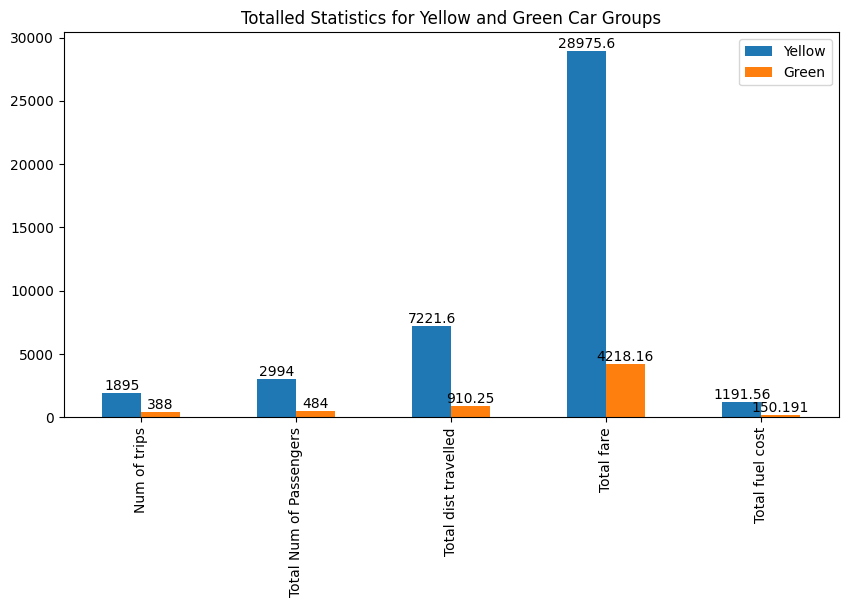

In [24]:
# Plotting to compare between Yellow Group and Green Group
yellow_sum = top10_fare_yellow_stats.sum()  # Sum together all rows for yellow cabs
yellow_sum.name = 'Yellow'  # Renaming for clarity
green_sum = top10_fare_green_stats.sum()    # Sum together all rows for green cabs
green_sum.name = 'Green'    # Renaming for clarity
total_sum = pd.concat([yellow_sum, green_sum], axis=1) # Concat into a single DF for easy plotting

fig = total_sum.plot.bar(figsize=(10,5), title="Totalled Statistics for Yellow and Green Car Groups")
fig.bar_label(fig.containers[0], label_type='edge')
fig.bar_label(fig.containers[1], label_type='edge')

array([<Axes: title={'center': 'Num of trips'}, xlabel='pickup_zone'>,
       <Axes: title={'center': 'Total Num of Passengers'}, xlabel='pickup_zone'>,
       <Axes: title={'center': 'Total dist travelled'}, xlabel='pickup_zone'>,
       <Axes: title={'center': 'Total fare'}, xlabel='pickup_zone'>,
       <Axes: title={'center': 'Total fuel cost'}, xlabel='pickup_zone'>],
      dtype=object)

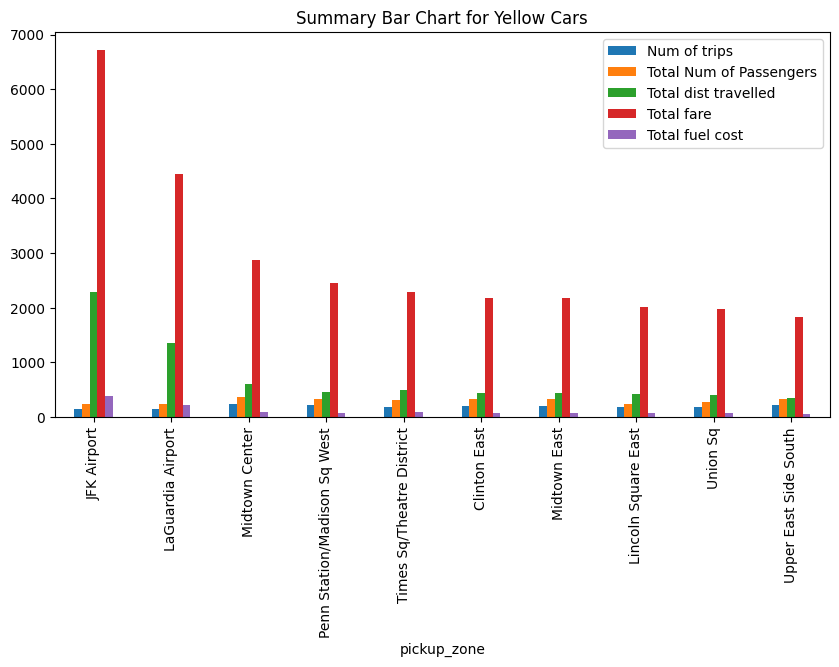

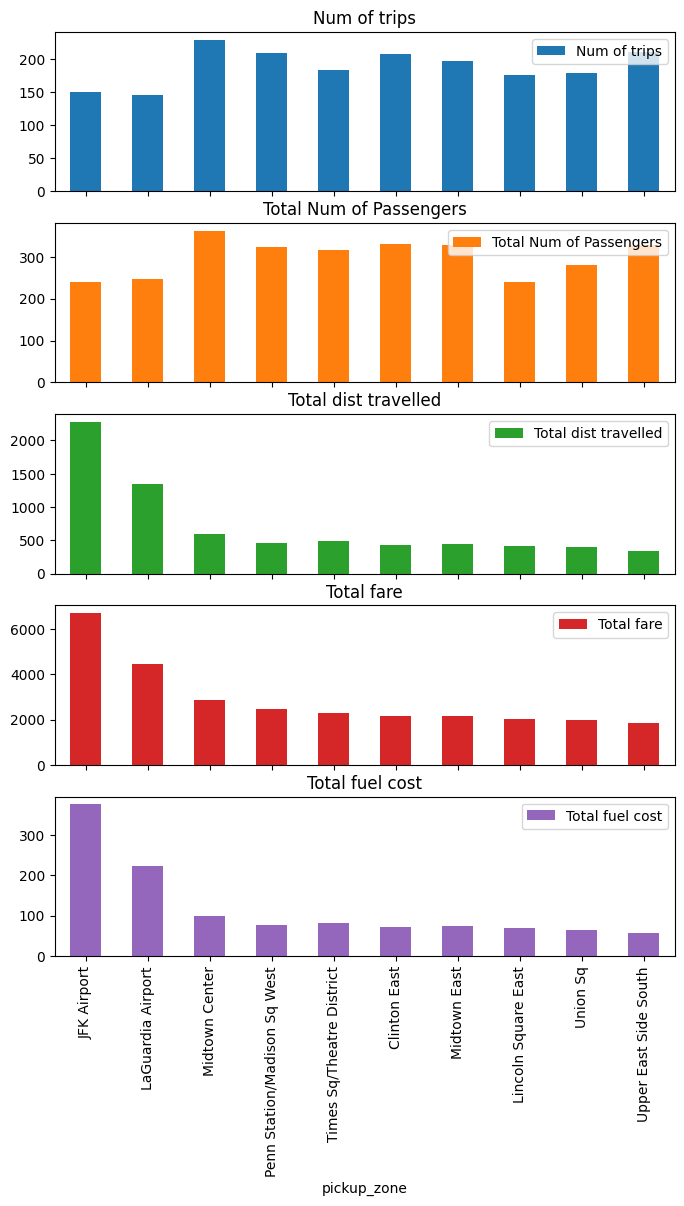

In [25]:
# Statistics for Yellow Cars
title = "Summary Bar Chart for Yellow Cars"
top10_fare_yellow_stats.plot.bar(figsize=(10,5), title=title)

# Bar chart for each statistic
top10_fare_yellow_stats.plot.bar(figsize=(8,12), subplots=True)

array([<Axes: title={'center': 'Num of trips'}, xlabel='pickup_zone'>,
       <Axes: title={'center': 'Total Num of Passengers'}, xlabel='pickup_zone'>,
       <Axes: title={'center': 'Total dist travelled'}, xlabel='pickup_zone'>,
       <Axes: title={'center': 'Total fare'}, xlabel='pickup_zone'>,
       <Axes: title={'center': 'Total fuel cost'}, xlabel='pickup_zone'>],
      dtype=object)

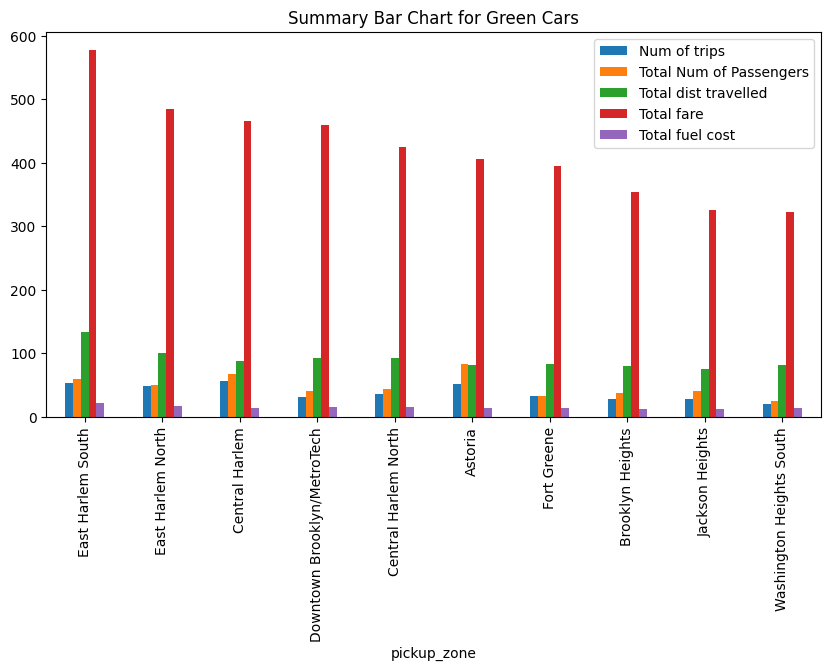

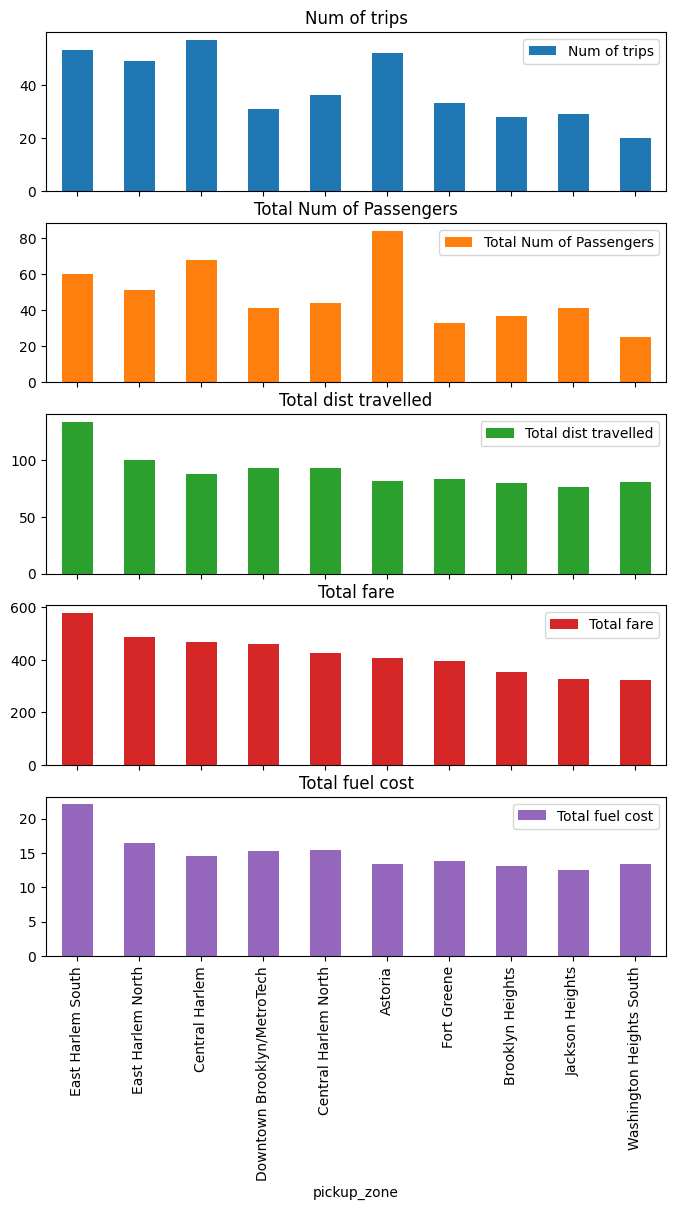

In [26]:
# Statistics for Green Cars
title = "Summary Bar Chart for Green Cars"
top10_fare_green_stats.plot.bar(figsize=(10,5), title=title)

# Bar chart for each statistic
top10_fare_green_stats.plot.bar(figsize=(8,12), subplots=True)

# Q10 C

Pie Chart: for each color car, plot a pie chart of the total cost fare each zone yields and another pie chart of the total fuel cost for each zone [8 marks] 

<Axes: title={'center': 'Total Fuel Cost ($) for Yellow Cars'}>

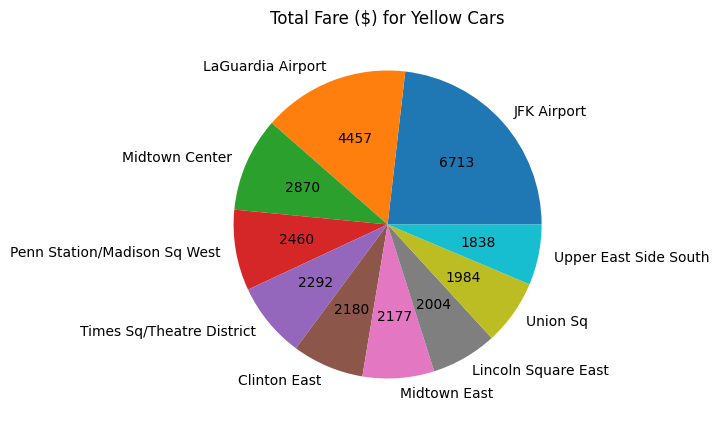

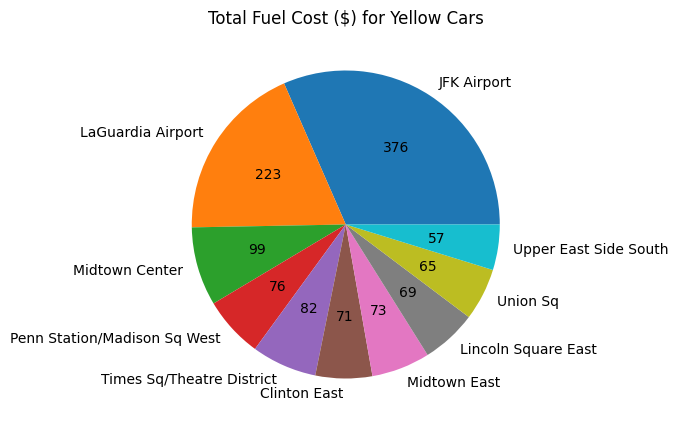

In [27]:
# Plot pie chart for yellow car total fare
top10_fare_yellow_stats.plot.pie(
    y='Total fare', label="", figsize=(5, 5), legend=False, 
    title='Total Fare ($) for Yellow Cars', 
    autopct=lambda x: '{:.0f}'.format(x*top10_fare_yellow_stats['Total fare'].sum()/100)
)

# Plot pie chart for yellow car total fuel cost
top10_fare_yellow_stats.plot.pie(
    y='Total fuel cost', label="", figsize=(5, 5), legend=False, 
    title='Total Fuel Cost ($) for Yellow Cars', 
    autopct=lambda x: '{:.0f}'.format(x*top10_fare_yellow_stats['Total fuel cost'].sum()/100)
)


<Axes: title={'center': 'Total Fuel Cost ($) for Green Cars'}>

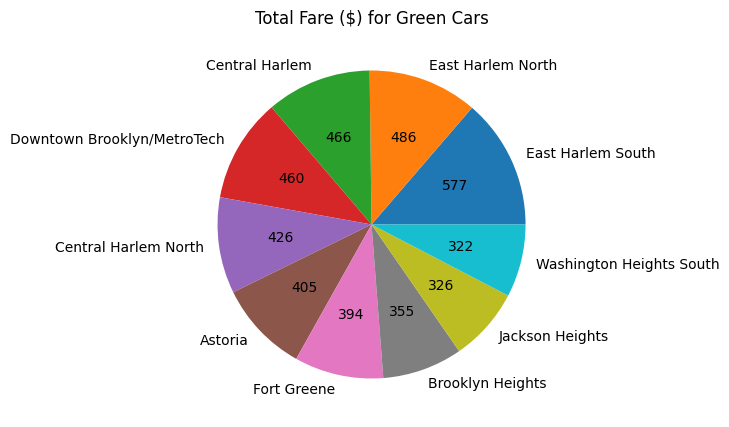

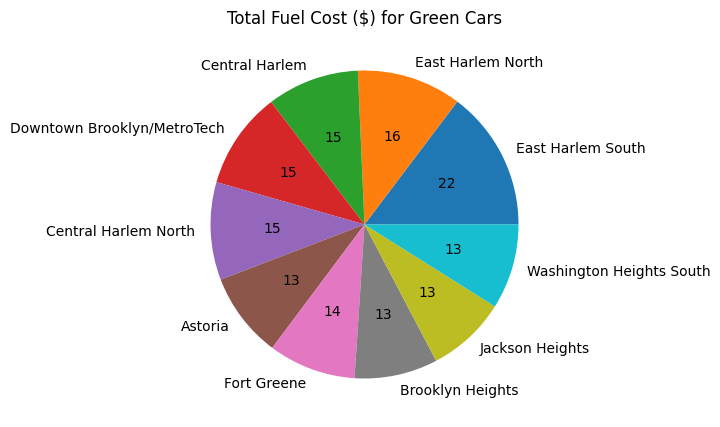

In [28]:
# Plot pie chart for green car total fare
top10_fare_green_stats.plot.pie(
    y='Total fare', label="", figsize=(5, 5), legend=False, 
    title='Total Fare ($) for Green Cars', 
    autopct=lambda x: '{:.0f}'.format(x*top10_fare_green_stats['Total fare'].sum()/100)
)

# Plot pie chart for green car total fuel cost
top10_fare_green_stats.plot.pie(
    y='Total fuel cost', label="", figsize=(5, 5), legend=False, 
    title='Total Fuel Cost ($) for Green Cars', 
    autopct=lambda x: '{:.0f}'.format(x*top10_fare_green_stats['Total fuel cost'].sum()/100)
)
